# Information 

The RMS Titanic, a luxury steamship sank in the early hours of April 15,1992, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage.

Of the 2240 passengers and crew on board, more than 1500 lost their lives in the disaster.

# Problem Statement

To predict wheather the passenger on titanic would survive the sinking or not

# Importing Necessary Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Variable Description

# Features/Independent Variables

1. PassengerId :The unique Id numbers allocated to each passenger
2. Pclass : Passenger class o
3. Name : Passenger name
4. Sex : Gender of Passenger
5. Age : Age of Passenger
6. SibSp : Number of Siblings/Spouses aboard the Titanic
7. Parch : Number of Parent/Children aboard the Titanic
8. Ticket : Ticket number
9. Fare : Amount of money spent on ticket
10. Cabin : Cabin category
11. Embarked : port where passenger embarked
                C = Cherbourg
                Q = Queenstown
                S = Southampton


# Target/Dependent Variables

 1. Survived : 0=Passenger survived & 1=Passenger died

# Variable Types

Categorical Variables :
    1. Survived
    2. Sex
    3. Pclass
    4. Embarked
    5. Cabin
    6. Name
    7. Ticket
    8. SibSp
    9. Parch
    
Numerical Variables : 
    1. PassengerId
    2. Age
    3. Fare
    

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
print("Data Shape",data.shape)

Data Shape (891, 12)


Here we can see that there are total 891 rows and 12 columns in our dataset.
Also the features 'Name','Sex','Ticket','Cabin'and 'Embarked' are of object data type. So we have to convert them into integer datatype

# Checking foar null values 

In our dataset the feature 'Age' has 177 null values, feature 'Cabin' has 687 null values and feature 'Embarked' has 2 only 2 null values.

# Categorical Variable Analysis

In [23]:
def bar_chart(feature):
    survived = data[data['Survived']==1][feature].value_counts()
    dead = data[data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


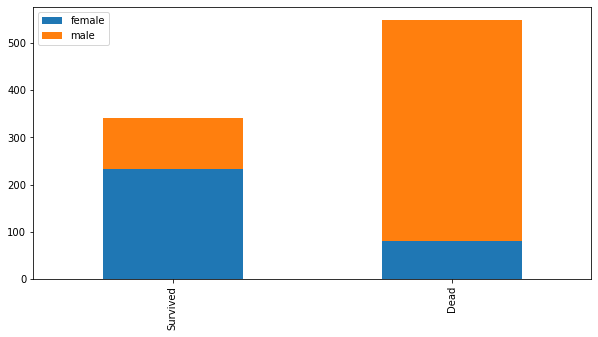

In [24]:
bar_chart('Sex')
print("Survived :\n",data[data['Survived']==1]['Sex'].value_counts())
print("Dead:\n",data[data['Survived']==0]['Sex'].value_counts())

The plot shows that the Women more likely survived than Men.

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


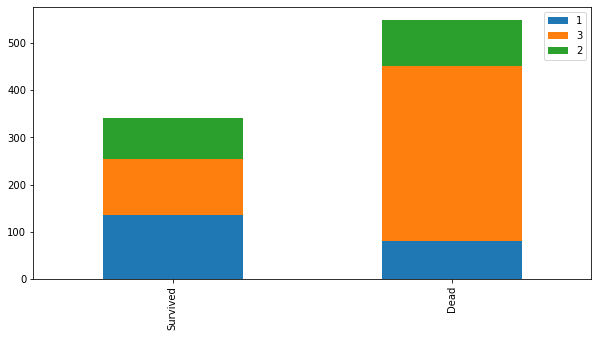

In [10]:
bar_chart('Pclass')
print("Survived :\n",data[data['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",data[data['Survived']==0]['Pclass'].value_counts())

The plot shows that the 1st class passengers more likely to survive than other classes and the 3rd class passenmgers more likely to die than other classes.

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


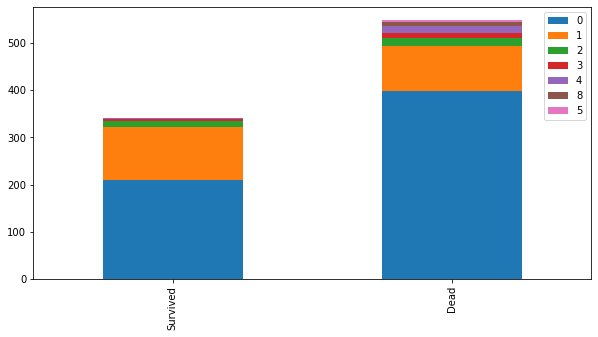

In [11]:
bar_chart('SibSp')
print("Survived :\n",data[data['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",data[data['Survived']==0]['SibSp'].value_counts())

The plot shows that the person aboarded with more than 2 siblings/spouse more likely survived whereas the person aboarded with no siblings/spouse more likely died.

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


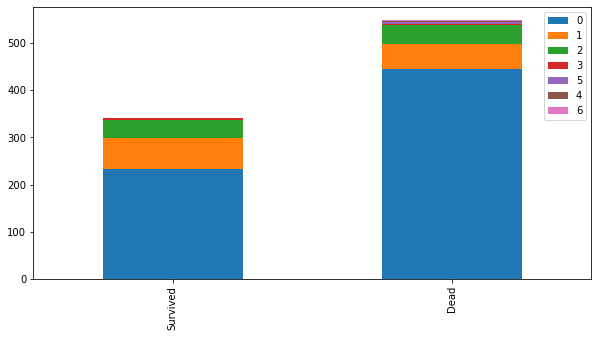

In [12]:
bar_chart('Parch')
print("Survived :\n",data[data['Survived']==1]['Parch'].value_counts())
print("Dead:\n",data[data['Survived']==0]['Parch'].value_counts())

The plot shows that the person aboarded with more than 2 parents/children more likely survived whereas the person aboarded alone more likely died.

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


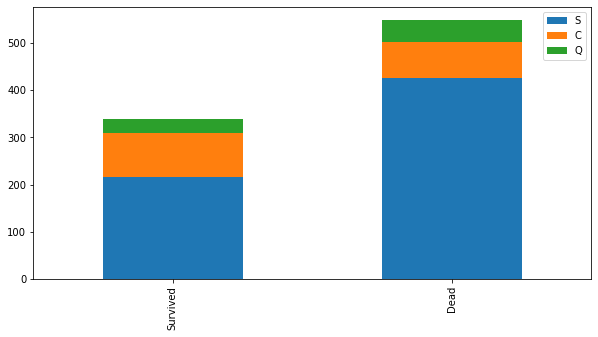

In [13]:
bar_chart('Embarked')
print("Survived :\n",data[data['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",data[data['Survived']==0]['Embarked'].value_counts())

From the above plot we can observe that the person aboarded from C slightly more likely survived.
The person aboarded from Q more likely dead.
The person aboarded from S more likely dead.


# Numerical Variable Analysis

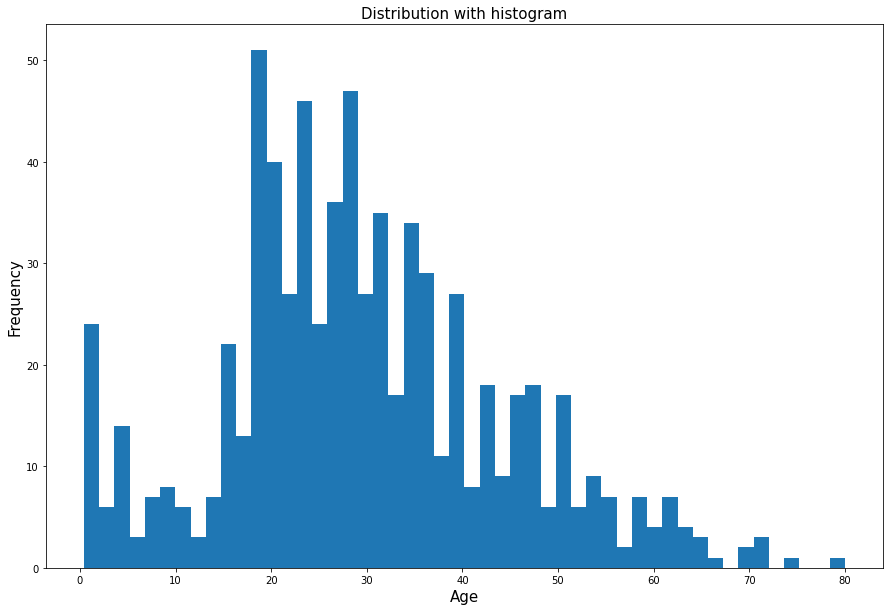

In [14]:
plt.figure(figsize=(15,10))
plt.hist(data["Age"],bins = 50)
plt.xlabel("Age",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("Distribution with histogram",fontsize = 15)
plt.show()

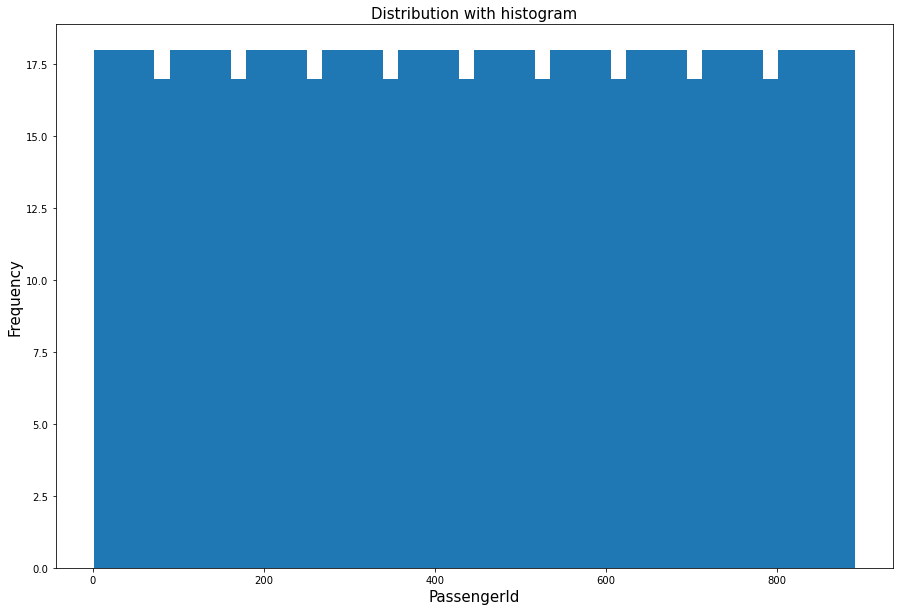

In [15]:
plt.figure(figsize=(15,10))
plt.hist(data["PassengerId"],bins = 50)
plt.xlabel("PassengerId",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("Distribution with histogram",fontsize = 15)
plt.show()

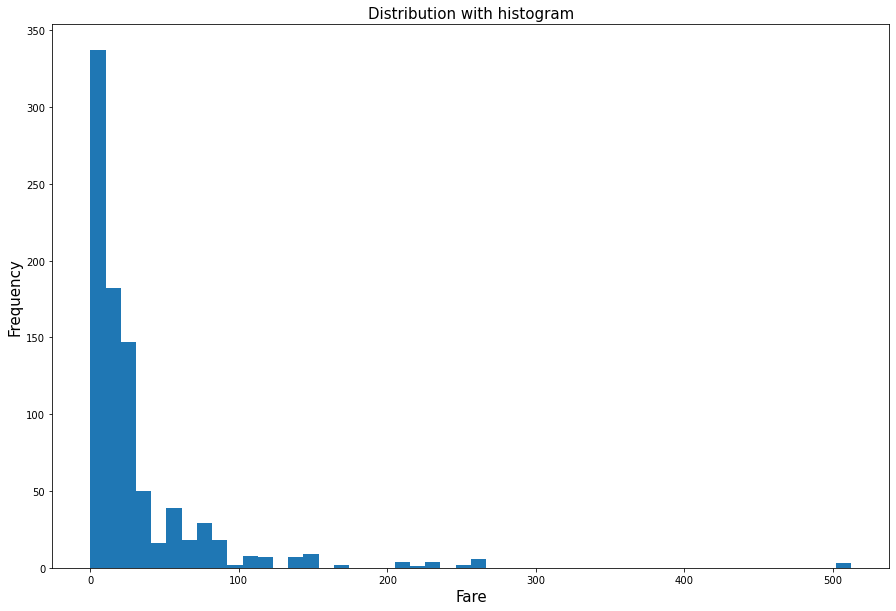

In [16]:
plt.figure(figsize=(15,10))
plt.hist(data["Fare"],bins = 50)
plt.xlabel("Fare",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.title("Distribution with histogram",fontsize = 15)
plt.show()

# Basic Data Analysis

1. Survived - Pclass
2. Survived - Age
3. Survived - SibSp
4. Survived - Parch

In [17]:
# Pclass vs Survived
data[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [18]:
# Age vs Survived
data[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
# SibSp vs Survived
data[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [20]:
# Parch vs Survived
data[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Outliers Detection

In [77]:
def detect_outliers(data,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [78]:
data.loc[detect_outliers(data,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
268,269,1,1,0,58.00,0,1,PC 17582,153.4625,0.8,0,2,2
305,306,1,1,1,0.92,1,2,113781,151.5500,0.8,0,3,4
438,439,0,1,1,64.00,1,4,19950,263.0000,0.8,0,0,6
587,588,1,1,1,60.00,1,1,13567,79.2000,0.4,1,0,3
659,660,0,1,1,58.00,0,2,35273,113.2750,1.2,1,0,3
745,746,0,1,1,70.00,1,1,WE/P 5735,71.0000,0.4,0,3,3
27,28,0,1,1,19.00,3,2,19950,263.0000,0.8,0,0,6
88,89,1,1,0,23.00,3,2,19950,263.0000,0.8,0,1,6
159,160,0,3,1,28.00,8,2,CA. 2343,69.5500,2.0,0,3,11
180,181,0,3,0,28.00,8,2,CA. 2343,69.5500,2.0,0,1,11


In [79]:
# drop outliers
data = data.drop(detect_outliers(data,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

In [80]:
data.shape

(875, 13)

# Percent Loss of Data

In [83]:
data_loss_percent = ((891-875)/891*100)
print("Data Loss% : ",data_loss_percent)

Data Loss% :  1.7957351290684627


It means that we are loosing only 1.79% data on outlier removal which can be affordable.

# Finding and Filling Null Values

# for feature 'Embarked'

In [9]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
data["Embarked"]=data["Embarked"].fillna("C")
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# for feature 'Age'

In [15]:
data[data["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,2
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,1
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,0


In [16]:
index_nan_age= list(data["Age"][data["Age"].isnull()].index)

for i in index_nan_age:
    age_pred = data["Age"][((data["SibSp"] == data.iloc[i]["SibSp"]) &(data["Parch"] == data.iloc[i]["Parch"])& (data["Pclass"] == data.iloc[i]["Pclass"]))].median()
    age_med = data["Age"].median()
    if not np.isnan(age_pred):
        data["Age"].iloc[i] = age_pred
    else:
        data["Age"].iloc[i] = age_med

In [17]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

# Title Extracting

In [18]:
name = data["Name"]
data["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [19]:
data["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

# Title Mapping

Mr : 0
Miss : 1
Mrs : 2
Others : 3

In [20]:
data["Title"] = data["Title"].replace(["Master","Mlle","Ms","Lady","Mme","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
data["Title"] = [0 if i == "Mr" else 1 if i == "Miss" else 2 if i == "Mrs" else 3 for i in data["Title"]]
data["Title"].head(20)

0     0
1     2
2     1
3     2
4     0
5     0
6     0
7     3
8     2
9     2
10    1
11    1
12    0
13    0
14    1
15    2
16    3
17    0
18    2
19    2
Name: Title, dtype: int64

In [21]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


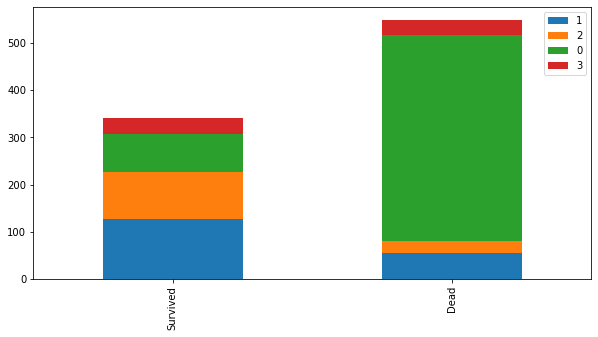

In [25]:
bar_chart('Title')

The chart shows that the person with Title 'Miss' most likely survived whereas the person with title 'Mr' most likely dead.

In [26]:
# delete unnecessary feature from dataset
# Since name is not much important feature so we delete this from dataset
data.drop('Name', axis=1, inplace=True)

In [27]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [84]:
data.loc[data['Sex']=="male","Sex"] = 1
data.loc[data['Sex']=="female","Sex"] = 0

In [85]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2.0,0,0,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0.8,1,2,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1,1
3,4,1,1,0,35.0,1,0,113803,53.1000,0.8,0,2,2
4,5,0,3,1,35.0,0,0,373450,8.0500,2.0,0,0,1


Since we have the two features 'SibSp' and 'Parch' which shows the family members of passenger aboarded in Titanic we can combine them and save in a new column 'Family'

In [32]:
data['Family']=data['SibSp']+data['Parch']+1   

In [33]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,1


In [35]:
data['Cabin'] =  data['Cabin'].str[:1]

<AxesSubplot:>

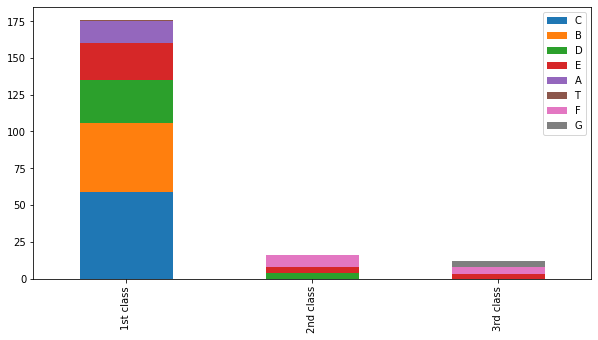

In [36]:
Pclass1 = data[data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = data[data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = data[data['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [37]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
data['Cabin'] = data['Cabin'].map(cabin_mapping)

In [38]:
data["Cabin"].fillna(data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [39]:
data['Cabin'].isnull().sum()

0

In [40]:
data.drop(['Ticket','SibSp','Parch'],axis=1)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,1,0,3,1,22.0,7.2500,2.0,S,0,2
1,2,1,1,0,38.0,71.2833,0.8,C,2,2
2,3,1,3,0,26.0,7.9250,2.0,S,1,1
3,4,1,1,0,35.0,53.1000,0.8,S,2,2
4,5,0,3,1,35.0,8.0500,2.0,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,13.0000,1.8,S,3,1
887,888,1,1,0,19.0,30.0000,0.4,S,1,1
888,889,0,3,0,13.5,23.4500,2.0,S,1,4
889,890,1,1,1,26.0,30.0000,0.8,C,0,1


In [41]:
embarked_mapping = {'S':0,'C':1,'Q':2}
data['Embarked'] = data['Embarked'].map(embarked_mapping)

In [42]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2.0,0,0,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0.8,1,2,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1,1
3,4,1,1,0,35.0,1,0,113803,53.1000,0.8,0,2,2
4,5,0,3,1,35.0,0,0,373450,8.0500,2.0,0,0,1


In [43]:
data.corr()["Survived"].sort_values()

Pclass        -0.338481
Cabin         -0.279477
Age           -0.049809
SibSp         -0.035322
PassengerId   -0.005007
Family         0.016639
Parch          0.081629
Embarked       0.111203
Fare           0.257307
Title          0.445792
Survived       1.000000
Name: Survived, dtype: float64

# Correlation Description

1. Pclass is having 33% negative correlation with target variable "Survived".
2. Cabin is having 27% negative correlation with target variable "Survived".
3. Age is having 4% negative correlation with target variable "Survived".
4. SibSp is having 3% negative correlation with target variable "Survived".
5. PassengerId is having 0.5% negative correlation with target variable "Survived".
6. Family is having 1% negative correlation with target variable "Survived".
7. Embarked is having 11% negative correlation with target variable "Survived".
8. Fare is having 25% negative correlation with target variable "Survived".
9. Title is having 44% negative correlation with target variable "Survived".
10. Parch is having 8% negative correlation with target variable "Survived".

<AxesSubplot:>

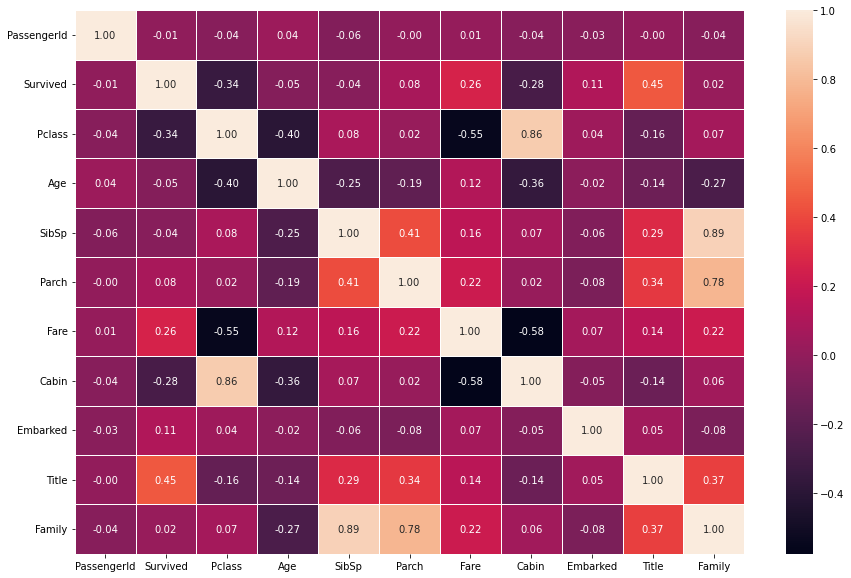

In [44]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(),annot = True,linewidth = 0.5,fmt = '0.2f')

Since the fetures ['Ticket','SibSp','Parch','PassengerId'] are not more important in survival prediction as they are not much correlated with the target variabl we remove these features and move ahead for further analysis.

In [45]:
df=data.drop(['Ticket','SibSp','Parch','PassengerId'],axis=1)
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,0,3,1,22.0,7.2500,2.0,0,0,2
1,1,1,0,38.0,71.2833,0.8,1,2,2
2,1,3,0,26.0,7.9250,2.0,0,1,1
3,1,1,0,35.0,53.1000,0.8,0,2,2
4,0,3,1,35.0,8.0500,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,1.8,0,3,1
887,1,1,0,19.0,30.0000,0.4,0,1,1
888,0,3,0,13.5,23.4500,2.0,0,1,4
889,1,1,1,26.0,30.0000,0.8,1,0,1


In [46]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Cabin       0
Embarked    0
Title       0
Family      0
dtype: int64

In [47]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.464553
Fare        4.787317
Cabin      -1.523266
Embarked    1.531946
Title       1.103844
Family      2.727441
dtype: float64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Title     891 non-null    int64  
 8   Family    891 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 62.8+ KB


In [50]:
# Features/Independent Variables
x = df.drop(['Survived'],axis=1)
y= df['Survived']

In [110]:
#Target/Dependent Variable
y = df.iloc[:,-1]

In [51]:
x

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,3,1,22.0,7.2500,2.0,0,0,2
1,1,0,38.0,71.2833,0.8,1,2,2
2,3,0,26.0,7.9250,2.0,0,1,1
3,1,0,35.0,53.1000,0.8,0,2,2
4,3,1,35.0,8.0500,2.0,0,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27.0,13.0000,1.8,0,3,1
887,1,0,19.0,30.0000,0.4,0,1,1
888,3,0,13.5,23.4500,2.0,0,1,4
889,1,1,26.0,30.0000,0.8,1,0,1


In [52]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Feature Scaling

In [53]:
from sklearn.preprocessing import power_transform

In [54]:
x = power_transform(x,method = 'yeo-johnson')

In [55]:
type(x)

numpy.ndarray

In [56]:
x

array([[ 0.86397329,  0.73769513, -0.49961498, ..., -0.61891897,
        -0.83648414,  0.83669643],
       [-1.45912855, -1.35557354,  0.67838964, ...,  1.56849524,
         1.34709779,  0.83669643],
       [ 0.86397329, -1.35557354, -0.19197816, ..., -0.61891897,
         0.87874335, -0.79100746],
       ...,
       [ 0.86397329, -1.35557354, -1.1965223 , ..., -0.61891897,
         0.87874335,  1.55821483],
       [-1.45912855,  0.73769513, -0.19197816, ...,  1.56849524,
        -0.83648414, -0.79100746],
       [ 0.86397329,  0.73769513,  0.2517781 , ...,  1.71350166,
        -0.83648414, -0.79100746]])

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.86397329,  0.73769513, -0.49961498, ..., -0.61891897,
        -0.83648414,  0.83669643],
       [-1.45912855, -1.35557354,  0.67838964, ...,  1.56849524,
         1.34709779,  0.83669643],
       [ 0.86397329, -1.35557354, -0.19197816, ..., -0.61891897,
         0.87874335, -0.79100746],
       ...,
       [ 0.86397329, -1.35557354, -1.1965223 , ..., -0.61891897,
         0.87874335,  1.55821483],
       [-1.45912855,  0.73769513, -0.19197816, ...,  1.56849524,
        -0.83648414, -0.79100746],
       [ 0.86397329,  0.73769513,  0.2517781 , ...,  1.71350166,
        -0.83648414, -0.79100746]])

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 45)

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [61]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, x,y , cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.7752809  0.7752809  0.78651685 0.85393258 0.82022472
 0.78651685 0.82022472 0.83146067 0.83146067]


In [64]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.

* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [65]:
random_state= 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [70]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8216549295774648
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8061032863849764
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8243740219092333
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.7948748043818465
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.8033841940532082


Text(0.5, 1.0, 'Cross Validation Scores')

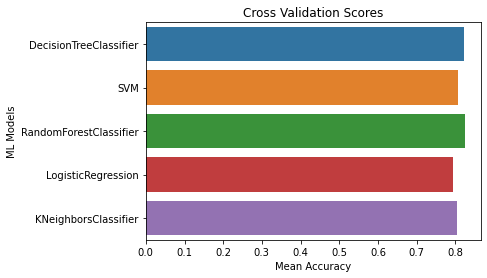

In [71]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# Ensemble Modeling

In [73]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_test),y_test))

0.8659217877094972


# Prediction and Submission

In [ ]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)